# Neural Network for Curve Fit

In [1]:
%matplotlib inline

import random
import os

import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import torch
import torch.nn as nn

os.environ["KERAS_BACKEND"] = "torch"
import keras_core as keras

RANDOM_SEED = 42

Using PyTorch backend.


## Keras

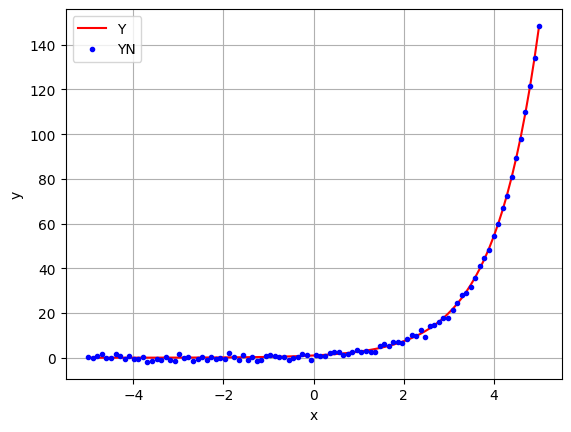

In [2]:
# random seed initialization
random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

X = np.linspace(-5, 5, 100)
Y = np.exp(X)
YN = Y + 1.0 * np.random.randn(*X.shape) # with noise

# # data as tensor
# X = torch.linspace(-5, 5, 100).view(-1, 1)
# Y = torch.exp(X)
# YN = Y + 1.0 * torch.randn(X.size()) # with noise

# Plot and visualizing the data points in blue
plt.plot(X, Y, 'r', label='Y')
plt.plot(X, YN, 'b.', label='YN')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True')
plt.show()

In [3]:
# define model
model = keras.Sequential()
model.add(keras.layers.Input([1]))
model.add(keras.layers.Dense(units=64, activation="relu"))
model.add(keras.layers.Dense(units=64, activation="relu"))
model.add(keras.layers.Dense(units=1, activation="linear"))
model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
)

# information about the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)                │        128 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 64)                │      4,160 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 1)                 │         65 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 4,353 (17.00 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# train the model using the data
loss_values_history = model.fit(X, YN, epochs=1000, verbose=1)

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1213.6183 
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1426.5798
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1423.2797
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1140.0703
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1276.9028
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 970.7822 
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1169.0189
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1153.4316
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 942.0054 
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1152.0972
Epoch 11/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1038.9589
Epoch 12/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1219.6450
Epoch 13/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 919.2153
Epoch 14/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 820.9194
Epoch 15/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3m

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


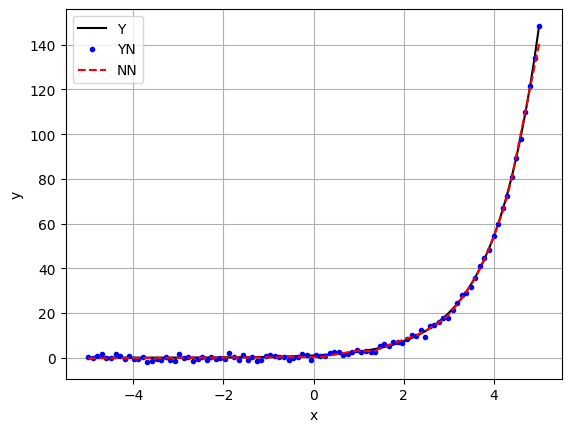

In [5]:
# plot the output of the model together with the original data

## compute prediction
YK = model.predict(X)

## plot
plt.plot(X, Y, 'k', label='Y')
plt.plot(X, YN, 'b.', label='YN')
plt.plot(X, YK, 'r--', label='NN')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True')
plt.show()

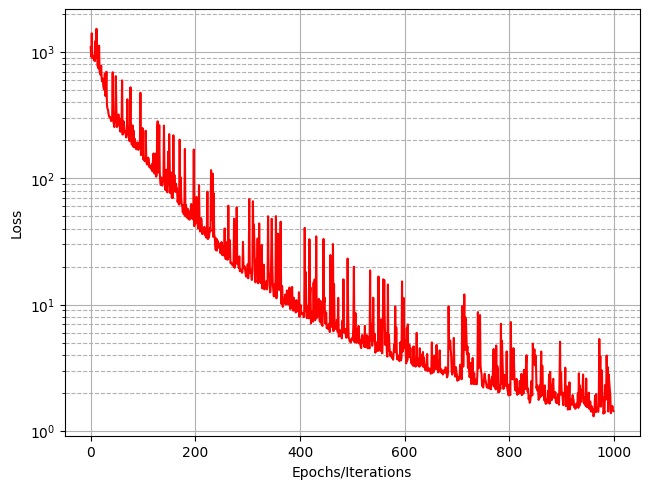

In [6]:
# plot the loss after each iteration
plt.semilogy(loss_values_history.history["loss"], 'r')
plt.tight_layout()
plt.grid('True')
plt.grid('True', which="minor", linestyle="--")
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step


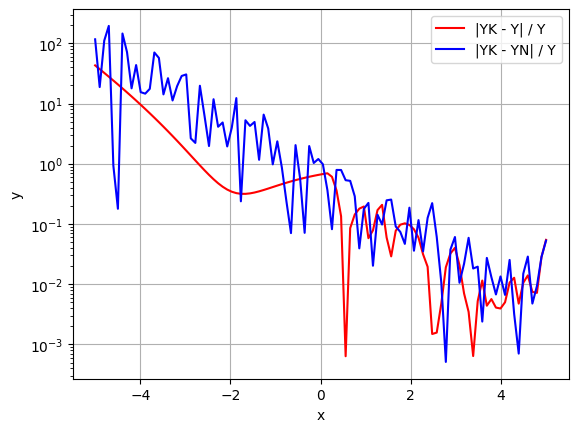

In [7]:
# plot difference

# compute predition
YK = model.predict(X).flatten()
diff = (np.abs(YK - Y) / Y).flatten()
diffN = (np.abs(YK - YN) / Y).flatten()
# plot
plt.semilogy(X, diff, 'r-', label= '|YK - Y| / Y')
plt.semilogy(X, diffN, 'b-', label='|YK - YN| / Y')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True')
plt.show()

## PyTorch

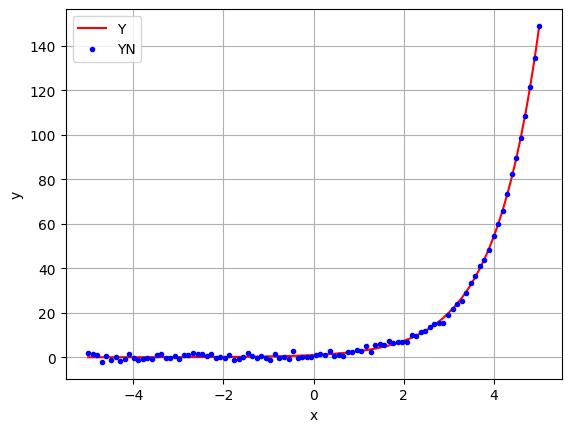

In [8]:
# random initialization
random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# data
X = torch.linspace(-5, 5, 100).view(-1, 1)
Y = torch.exp(X)
YN = Y + 1.0 * torch.randn(X.size()) # with noise

# plot
plt.plot(X.numpy(), Y.numpy(), 'r', label='Y')
plt.plot(X.numpy(), YN.numpy(), 'b.', label='YN')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True')
plt.show()

In [9]:
# define model
model = nn.Sequential(
    nn.Linear(1, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 1),
)

In [10]:
# optimize

## initialize
loss_function = nn.MSELoss()  # loss function - mean square error
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-3)
number_of_iterations = 8000
loss_values_history = []

# ## initialize data as tensor, if they came from numpy
# X = torch.from_numpy(X).type(torch.float32).view(len(X), 1)
# YN = torch.from_numpy(YN).type(torch.float32).view(len(YN), 1)

## optimization procedure
for _ in tqdm(range(number_of_iterations)):
    # reinitialize gradients
    optimizer.zero_grad()
    # making predictions with forward pass
    Y_pred = model.forward(X)
    # calculating the loss between original and predicted data points
    loss = loss_function(Y_pred, YN)
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    optimizer.step()
    # storing the calculated loss in a list
    loss_values_history.append(loss.item())

  0%|          | 0/8000 [00:00<?, ?it/s]

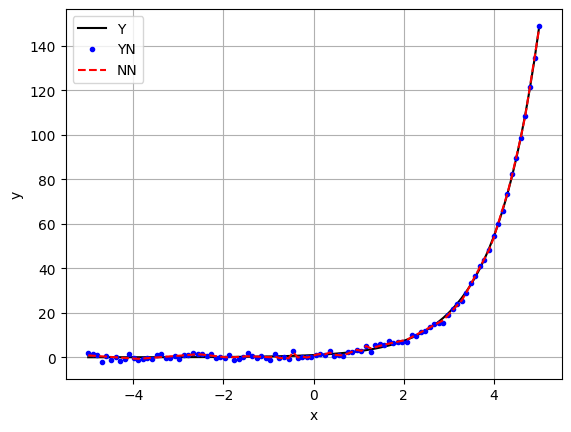

In [11]:
# plot the output of the model together with the original data
with torch.no_grad():
    # compute predition
    YPT = model.forward(X)
    # plot
    plt.plot(X.numpy(), Y.numpy(), 'k', label='Y')
    plt.plot(X.numpy(), YN.numpy(), 'b.', label='YN')
    plt.plot(X.numpy(), YPT.numpy(), 'r--', label='NN')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid('True')
    plt.show()

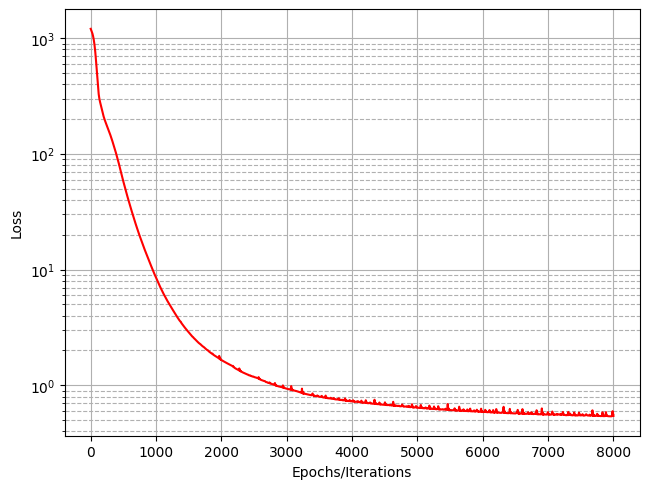

In [12]:
# plot the loss after each iteration
plt.semilogy(loss_values_history, 'r')
plt.tight_layout()
plt.grid('True')
plt.grid('True', which="minor", linestyle="--")
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

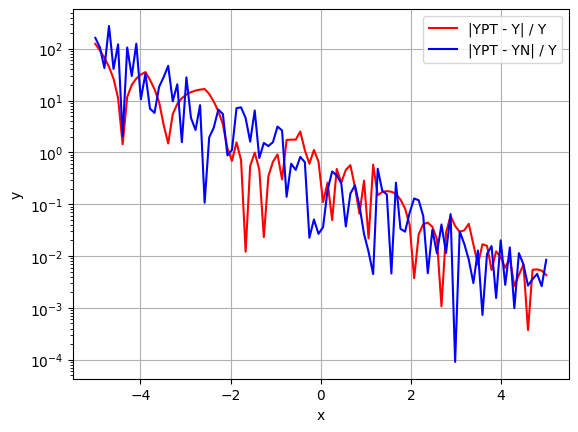

In [13]:
# plot difference
with torch.no_grad():
    # compute predition
    YPT = model.forward(X)
    diff =  torch.abs(YPT - Y) / Y
    diffN = torch.abs(YPT - YN) / Y
    # plot
    plt.semilogy(X.numpy(), diff.numpy(), 'r-', label= '|YPT - Y| / Y')
    plt.semilogy(X.numpy(), diffN.numpy(), 'b-', label='|YPT - YN| / Y')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid('True')
    plt.show()